# Метод опорных векторов - Support Vector Machines
## Регрессия

Идея метода опорных векторов для задачи регрессии похожа на идею метода опорных векторов для классификации, но на этот раз мы хотим предсказать значение непрерывной целевой переменной на основе признаков:

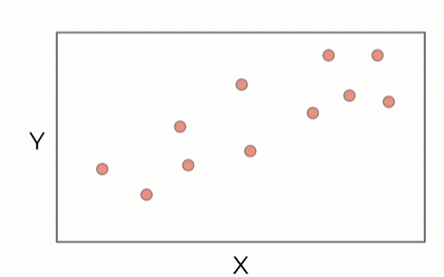

В данном примере у нас есть один признак X и целевая переменная y. Метод опорных векторов делает следующее - использует зазоры, чтобы провести некоторую кривую линию с использованием опорных векторов:

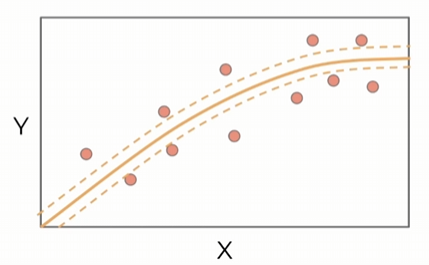

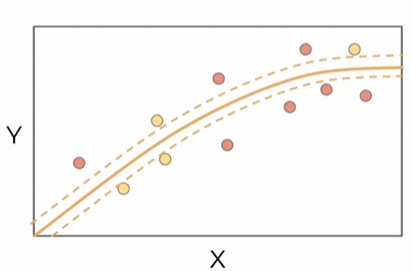

Далее эта полученная кривая линия может применяться для предсказания значений непрерывной переменной, для какого-то нового значения признака X - можно найти соответствующее значение y и это будет предсказание нашей модели:

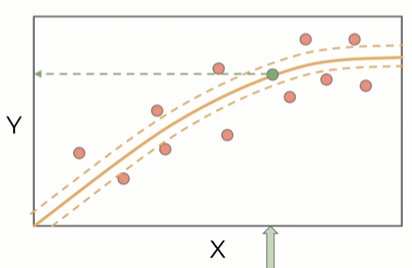

В итоге, мы предсказываем значение целевой переменной и здесь уже не важно, по какую сторону от этой кривой линии находятся те или иные точки. Важно лишь то, что эти точки используются для построения этой кривой линии.

### Задача
Испытание на осадку бетона ([англ. concrete slump test](https://en.wikipedia.org/wiki/Concrete_slump_test)) измеряет консистенцию свежего бетона до его застывания. Это нужно для проверки качества свежего бетона, а также проверки того, насколько легко льётся бетон. Неудовлетворительные результаты могут быть признаком того, что бетон был неправильно замешан.

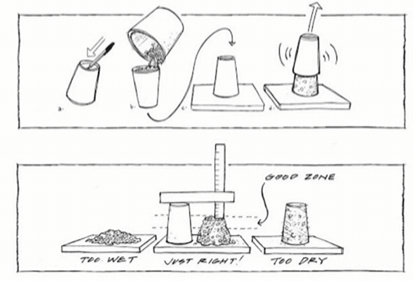

Наш набор данных состоит из различных характеристик бетона, а также из результатов испытаний на осадку, в сантиметрах. Позже, через 28 дней, затвердевший бетон проверяют на силу сжатия.

Входные переменные (7) (килограмм компонента на один кубический метр бетона):
* Цемент (Cement)
* Шлак (Slag)
* Летучая зола (Fly ash)
* Вода (Water)
* Суперпластификатор (SP)
* Крупный наполнитель (Coarse Aggr.)
* Мелкий наполнитель (Fine Aggr.)

Результирующие переменные (3):
* Осадка (SLUMP) (cm)
* Наплыв (FLOW) (cm)
* **Прочность на сжатие (compressive strength) через 28 дней (Mpa)**

Источник данных: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../DATA/cement_slump.csv')
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


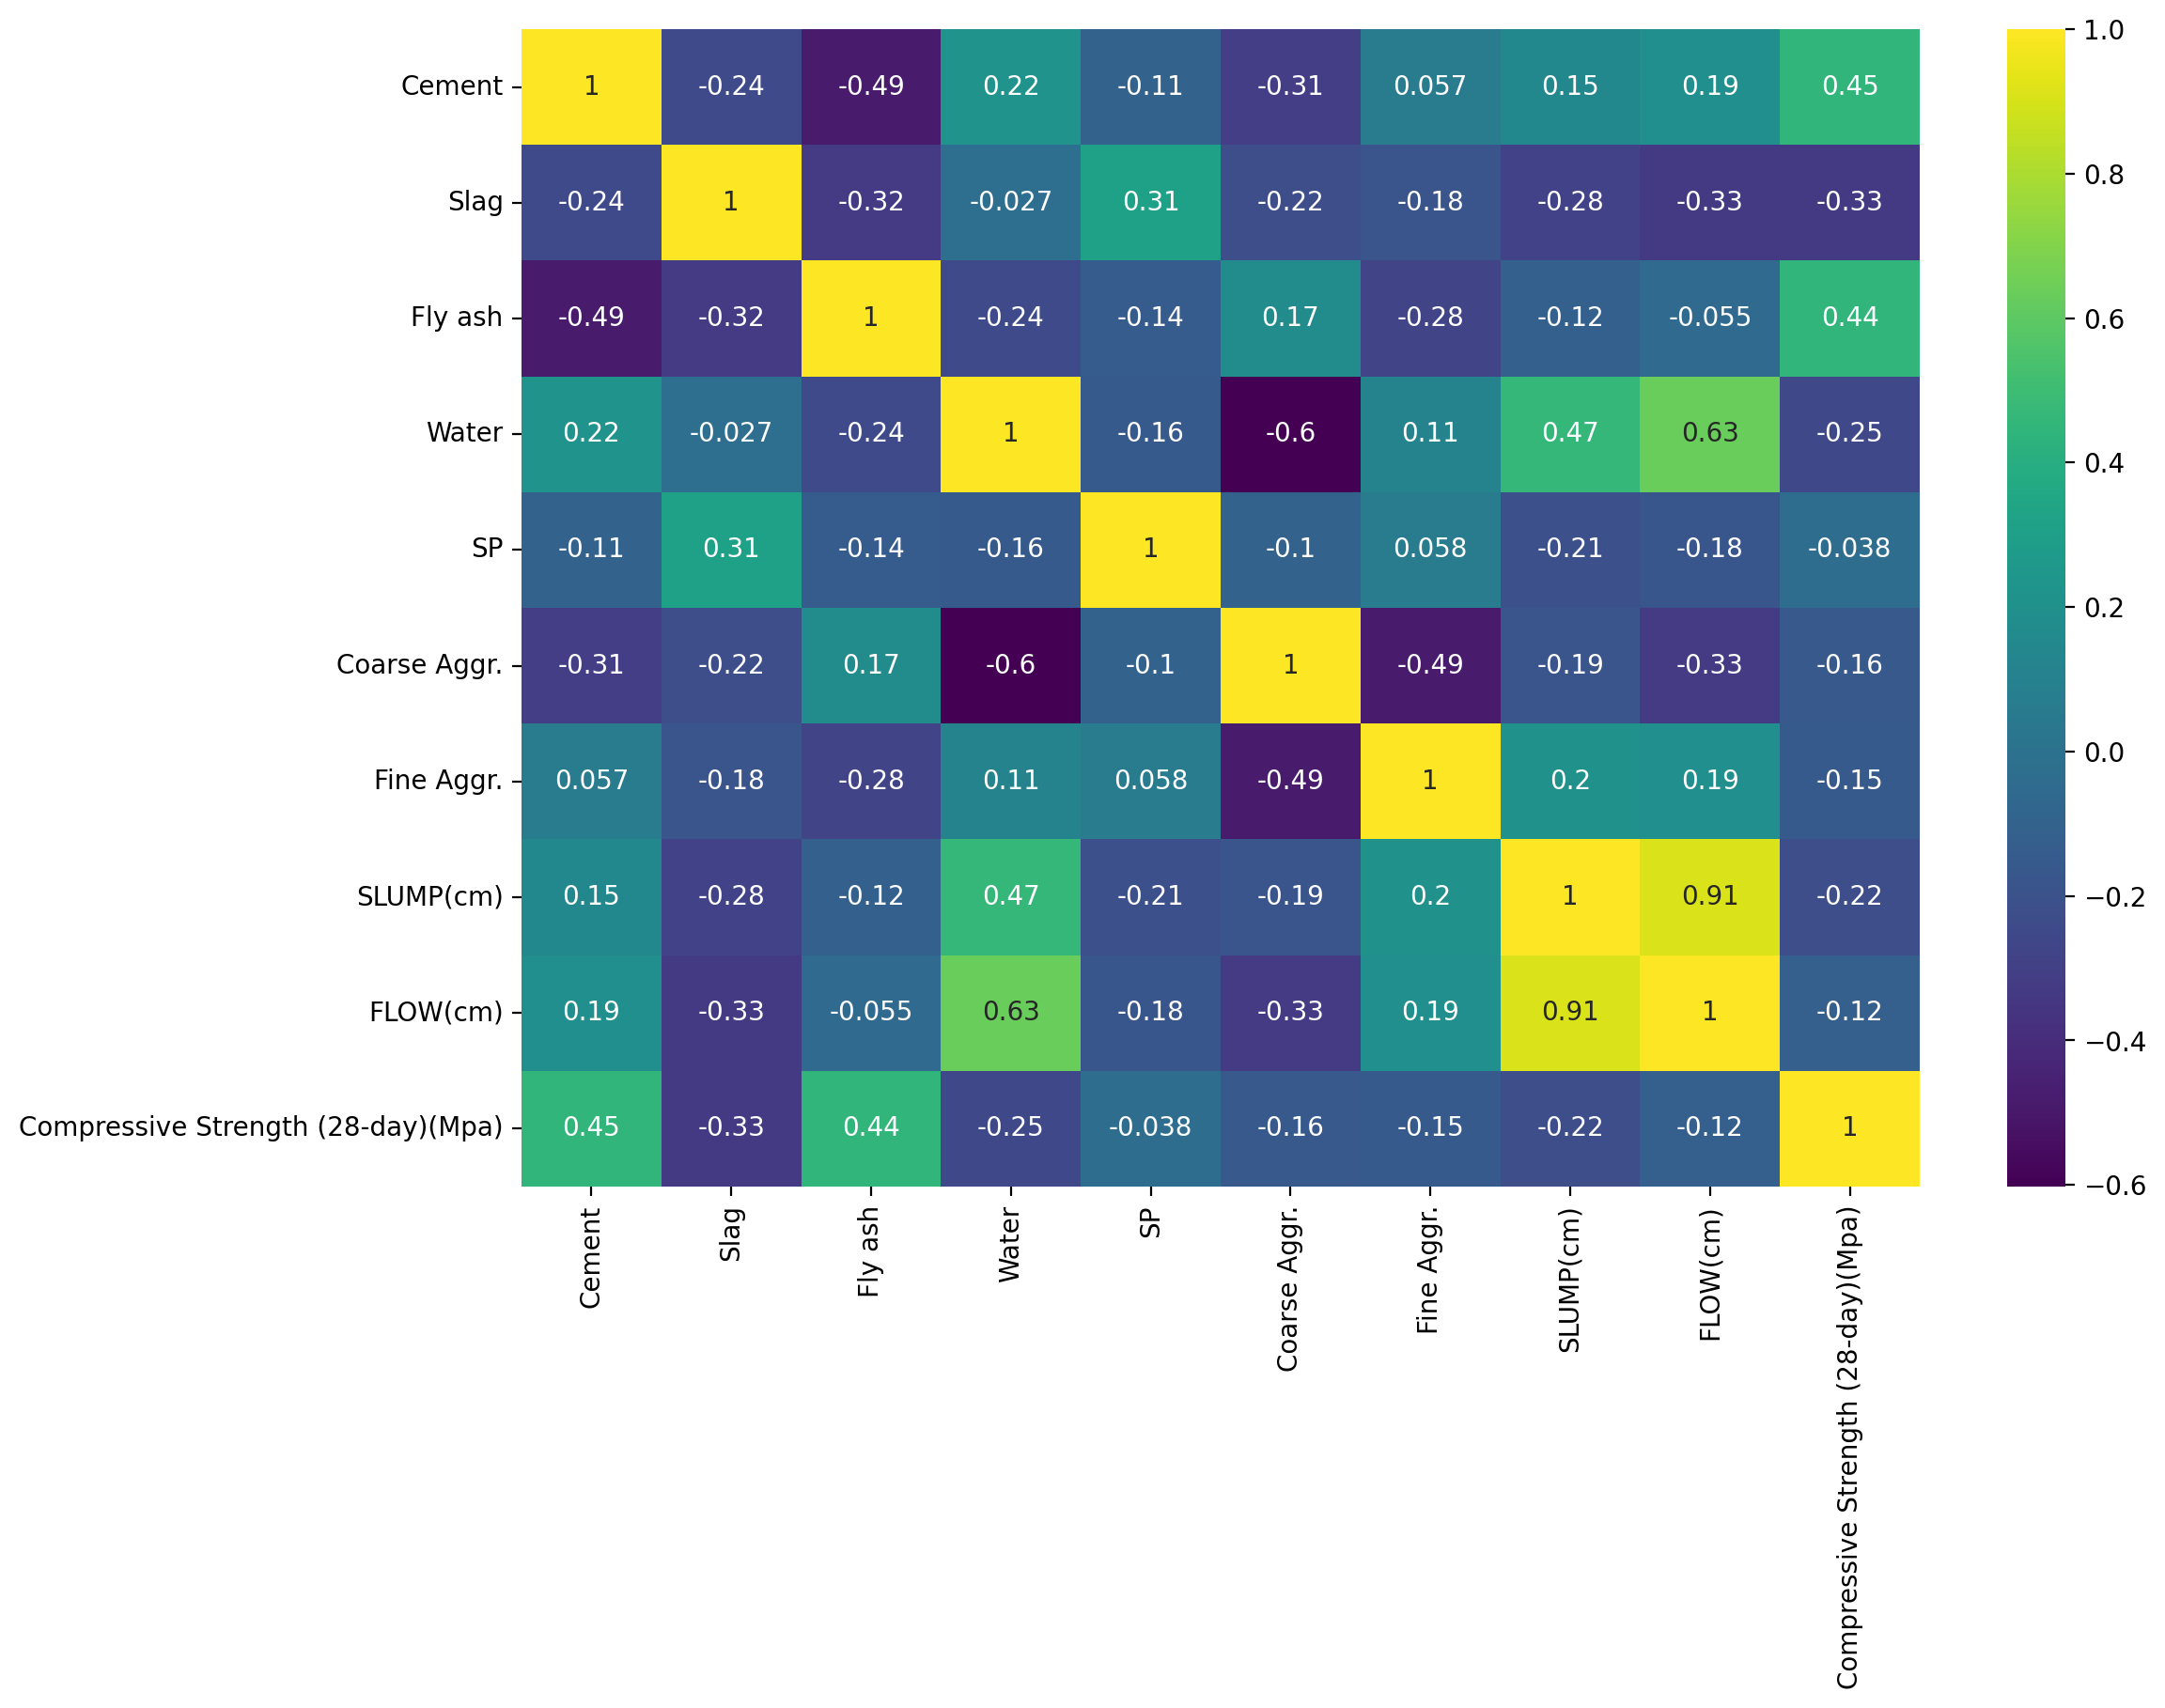

In [18]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [20]:
df.corr()['Compressive Strength (28-day)(Mpa)']

Cement                                0.445656
Slag                                 -0.331522
Fly ash                               0.444380
Water                                -0.254320
SP                                   -0.037909
Coarse Aggr.                         -0.160610
Fine Aggr.                           -0.154532
SLUMP(cm)                            -0.223499
FLOW(cm)                             -0.124189
Compressive Strength (28-day)(Mpa)    1.000000
Name: Compressive Strength (28-day)(Mpa), dtype: float64

### Разбиение на обучающий и тестовый наборы данных
Альтернативно, можно реализовать этот процесс в виде пайплайна, что-нибудь похожее на вот это:

    >>> from sklearn.pipeline import make_pipeline
    >>> from sklearn.preprocessing import StandardScaler
    >>> from sklearn.svm import SVR

    >>> clf = make_pipeline(StandardScaler(), SVR())

In [24]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [26]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [28]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Для метода опорных векторов очень рекомендуется масштабирование признаков, так как метод опорных векторов работает в пространстве признаков, а также мы можем расширять пространство признаков в пространство большей размерности. Любые алгоритмы, в которых используются какие-либо метрики расстояния между векторами, нуждаются в масштабировании.**

In [34]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Метод опорных векторов - регрессия

Существуют три разных реализации регрессии метода опорных векторов: SVR, NuSVR и LinearSVR. LinearSVR быстрее, чем SVR, но рассматривает только линейные ядра. Третий метод - NuSVR - реализует немного другой подход, чем SVR и LinearSVR. Более подробно о деталях реализации можно [почитать вот здесь](https://scikit-learn.org/stable/modules/svm.html#svm-implementation-details).

In [40]:
from sklearn.svm import SVR, LinearSVR

In [42]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomput

**Если в данных много шума, то можно уменьшить значение `C`, потому что такое уменьшение увеличивает регуляризацию.**

Парметр `epsilon` - отвечает за объём ошибок, которые мы разрешаем для каждой отдельной точки в обучающем наборе. Если указать `epsilon` = 0, то не будем допускать ошибок вообще, что скорее всего приведёт к переобученности модели. По умолчанию, параметр равен 0.1, но здесь сложно заранее сказать, какое значение будет наилучшим для тех или иных данных - имеет смысл с помощью поиска по сетке попробовать различные значения.

In [44]:
help(LinearSVR)

Help on class LinearSVR in module sklearn.svm._classes:

class LinearSVR(sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  LinearSVR(*, epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual='auto', verbose=0, random_state=None, max_iter=1000)
 |  
 |  Linear Support Vector Regression.
 |  
 |  Similar to SVR with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  The main differences between :class:`~sklearn.svm.LinearSVR` and
 |  :class:`~sklearn.svm.SVR` lie in the loss function used by default, and in
 |  the handling of intercept regularization between those two implementations.
 |  
 |  This class supports both dense and sparse input.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  .. versionadded:: 0.16


In [47]:
base_model = SVR()

In [49]:
base_model.fit(scaled_X_train, y_train)

SVR()

In [51]:
base_preds = base_model.predict(scaled_X_test)

### Оценка модели
Поскольку это модель регрессии, то для ее оценки будут использоваться метрики для задач регрессии.

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [60]:
MAE = mean_absolute_error(y_test, base_preds)
MAE

5.236902091259179

Это значение в тех единицах, в которых измеряется целевая переменная.

In [63]:
RMSE = np.sqrt(mean_squared_error(y_test, base_preds))
RMSE

6.695914838327133

In [65]:
y_test.mean()

36.26870967741935

### Поиск по сетке для нахождения лучшей модели

In [68]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4],
              'epsilon': [0, 0.01, 0.1, 0.5, 1, 2]}

In [70]:
from sklearn.model_selection import GridSearchCV

In [72]:
svr = SVR()

In [74]:
grid = GridSearchCV(svr, param_grid)

In [76]:
grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [78]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

Мы получили достаточно простую линейную модель.

### Оценка работы модели

In [82]:
grid_preds = grid.predict(scaled_X_test)

In [84]:
MAE = mean_absolute_error(y_test, grid_preds)
MAE

2.512801221076198

In [86]:
RMSE = np.sqrt(mean_squared_error(y_test, grid_preds))
RMSE

3.1782103051198347

Мы получили значительное улучшение по сравнению с базовой моделью.

Для метода опорных векторов как для задачи классификации, так и для задачи регрессии - нужно:
* Выполнять масштабирование признаков
* Выполнять поиск оптимальных гиперпараметров

Потому что сложно заранее сказать, какие значения будут оптимальными для конкретных данных.